# Project Title: Analysis of Market Capitalization and Sales Performance of Top 500 Indian Companies

## Introduction

In the competitive landscape of business, understanding and analyzing market trends and performance metrics of key players is crucial for strategic decision-making. This project focuses on analyzing the market capitalization and quarterly sales of the top 500 companies in India. The goal is to provide actionable insights by comparing these companies based on their market capitalization, quarterly sales, and sales efficiency ratios.


## Problem Statement
Without analyzing the competition, it is difficult for a business to survive. You are
tasked to analyse the competition for the management to provide better results. This
data set has information on the market capitalization of the top 500 companies in India

## About the Project

**Objective:** To analyze the competition within the Indian market by evaluating the top 500 companies based on market capitalization and quarterly sales.

**Data Description:**
- **S.No.**: Serial Number
- **Name**: Company Name
- **Mar Cap - Crore**: Market Capitalization in Crores
- **Sales Qtr - Crore**: Quarterly Sales in Crores

**Technologies and Libraries Used:**
- **Python**: For data processing, cleaning, and analysis.
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations.
- **Plotly** : For Data Visulisation.

## Key Question 
1. What are the largest and smallest companies by market capitalization?
2. Which companies have the highest and lowest quarterly sales?
3. How does the Sales Efficiency Ratio vary among the companies?
4. Who are the top and bottom performers based on the Sales Efficiency Ratio?
---

### ***IMPORT THE NECCESSARY LIBRARY***

In [197]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.io as pt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from fancyimpute import IterativeImputer
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import random
from IPython.display import Image
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format

pio.renderers.default = "svg"
%matplotlib inline

---

### ***READING AND THE PREPROCESSING THE DATA***

In [198]:
df = pd.read_csv("Financial Analytics data.csv")

In [199]:
df.head(10)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.7200,99810.0000,NaN
1,2,TCS,563709.8400,30904.0000,NaN
2,3,HDFC Bank,482953.5900,20581.2700,NaN
3,4,ITC,320985.2700,9772.0200,NaN
4,5,H D F C,289497.3700,16840.5100,NaN
5,6,Hind. Unilever,288265.2600,8590.0000,NaN
6,7,Maruti Suzuki,263493.8100,19283.2000,NaN
7,8,Infosys,248320.3500,17794.0000,NaN
8,9,O N G C,239981.5000,22995.8800,NaN
9,10,St Bk of India,232763.3300,57014.0800,NaN


In [200]:
df.tail(10)


,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
478,491,Kaveri Seed Co.,3125.8300,70.6400,NaN
479,492,Star Ferro Cem.,3115.9800,393.4900,NaN
480,493,Deepak Fert.,3079.0600,1644.9200,NaN
481,494,Va Tech Wabag,3041.9300,460.8900,NaN
482,495,Prime Focus,3031.5000,609.6100,NaN
483,496,Lak. Vilas Bank,3029.5700,790.1700,NaN
484,497,NOCIL,3026.2600,249.2700,NaN
485,498,Orient Cement,3024.3200,511.5300,NaN
486,499,Natl.Fertilizer,3017.0700,2840.7500,NaN
487,500,L T Foods,NaN,NaN,NaN


In [201]:
df.sample(10)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
19,20,Hind.Zinc,133266.5600,5922.0000,NaN
269,282,ITI,8124.6000,250.9700,NaN
213,220,P I Inds.,11564.2200,537.7400,NaN
426,439,VRL Logistics,3824.6900,489.3400,NaN
131,134,Cholaman.Inv.&Fn,20832.4000,1404.3300,NaN
256,269,Infibeam Incorp.,8646.5400,213.4800,NaN
321,334,Sunteck Realty,5865.0400,201.5000,NaN
47,48,SBI Life Insuran,67465.0000,9569.9700,NaN
21,22,HCL Technologies,126335.2700,12809.0000,NaN
217,224,Prestige Estates,11353.1300,1272.3000,NaN


In [202]:
df.shape

(488, 5)

In [203]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,488.0000,251.5082,145.8841,1.0000,122.7500,252.5000,378.2500,500.0000
Mar Cap - Crore,479.0000,28043.8571,59464.6158,3017.0700,4843.5750,9885.0500,23549.9000,583436.7200
Sales Qtr - Crore,365.0000,4395.9768,11092.2062,47.2400,593.7400,1278.3000,2840.7500,110666.9300
Unnamed: 4,94.0000,1523.8701,1800.0088,0.0000,407.1675,702.3250,2234.8150,7757.0600


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [205]:
df.columns


Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [206]:
df.dtypes

S.No.                  int64
Name                  object
Mar Cap - Crore      float64
Sales Qtr - Crore    float64
Unnamed: 4           float64
dtype: object

---

### ***NULL VALUES AND THE IMPUTATION OF THE NULL VALUES***

In [207]:
df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [208]:
df.shape

(488, 5)

In [209]:
# Handling missing values for 'Mar Cap - Crore' with mean imputation
imputer_mar_cap = SimpleImputer(strategy='mean')
df[['Mar Cap - Crore']] = imputer_mar_cap.fit_transform(df[['Mar Cap - Crore']])


In [210]:
# Handling missing values for 'Sales Qtr - Crore' using IterativeImputer
imputer_sales = IterativeImputer()
df[['Sales Qtr - Crore']] = imputer_sales.fit_transform(df[['Sales Qtr - Crore']])

In [211]:
# Handling missing values for 'Unnamed: 4'
# Since it has a high number of missing values, we might choose to drop this column
df.drop(columns=['Unnamed: 4'], inplace=True)

In [212]:
df.drop(columns=['S.No.'], inplace=True)

In [213]:
df.isnull().sum()

Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [214]:
df.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
Mar Cap - Crore,488,28043,58912,3017,4879,10380,25502,583436
Sales Qtr - Crore,488,4395,9589,47,725,2095,4395,110666


In [215]:
df.columns = ['Name of Company', 'Market Cap (in Cr)', 'Quaterly Sales (in Cr)']

---

### ***DISTRIBUTION OF THE NUMERICAL COLUMNS***

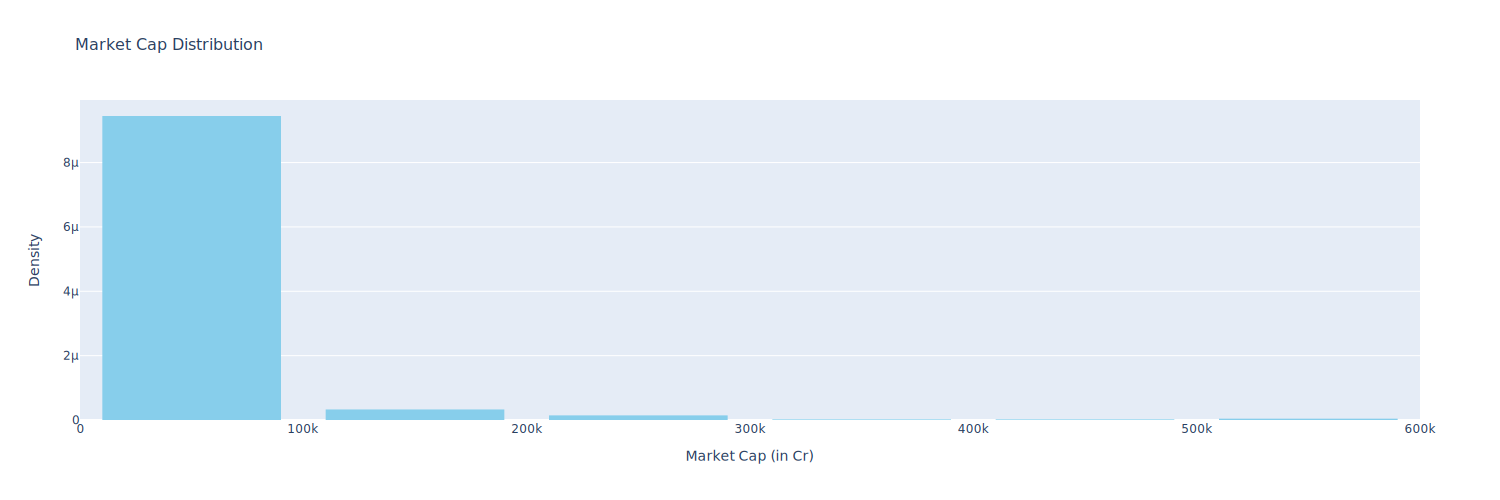

In [216]:
fig = px.histogram(
    df, 
    x='Market Cap (in Cr)', 
    nbins=10,  # Number of bins
    color_discrete_sequence=['skyblue'],  # Color of the bars
    title='Market Cap Distribution',
    histnorm='probability density'  # Normalizes histogram to display density
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Market Cap (in Cr)',
    yaxis_title='Density',
    bargap=0.2,  # Gap between bars
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    width=1500,  # Width of the figure
    height=500,
    title_font=dict(size=16)
)

# Show the plot
fig.show()


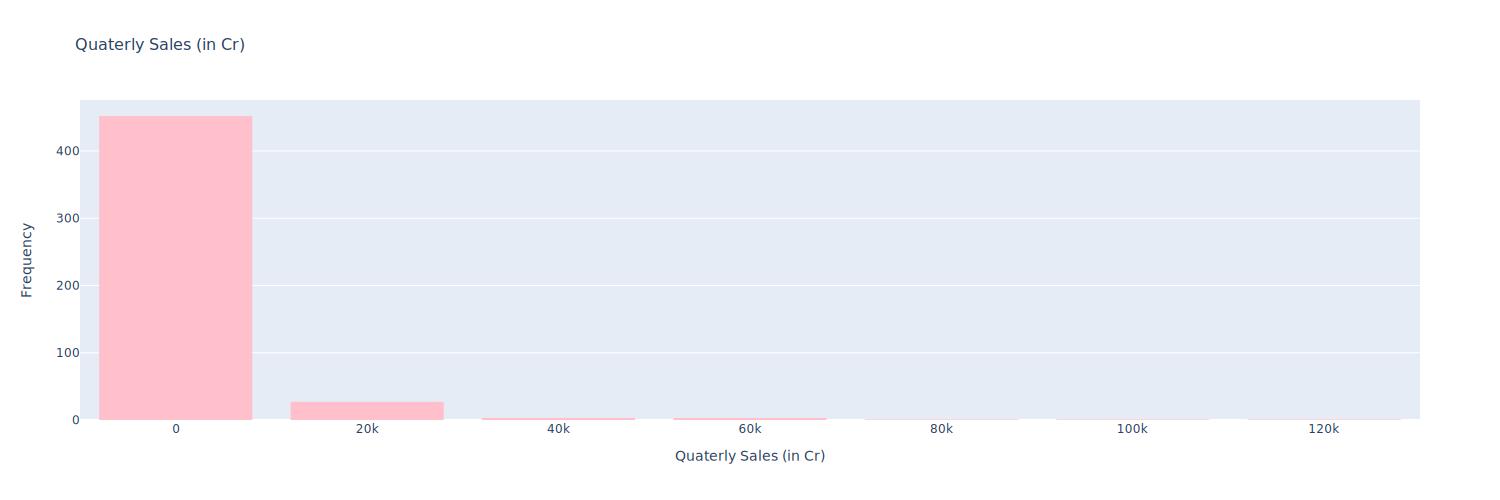

In [217]:
fig = px.histogram(
    df, 
    x='Quaterly Sales (in Cr)', 
    nbins=10,  # Number of bins
    color_discrete_sequence=['pink'],  # Color of the bars
    title='Quaterly Sales (in Cr)'
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Quaterly Sales (in Cr)',
    yaxis_title='Frequency',
    bargap=0.2,  # Gap between bars
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    width=1500,  # Width of the figure
    height=500,
    title_font=dict(size=16)
)

# Show the plot
fig.show()

---

### ***LARGEST MARKET CAP COMPANY***

In [218]:
sorted_df = df.sort_values(by='Market Cap (in Cr)', ascending=False)
print(f"Largest market Cap company: {sorted_df.iloc[0]['Name of Company']}")
print(f"Market cap: {sorted_df.iloc[0]['Market Cap (in Cr)'].astype(int)} Cr")

Largest market Cap company: Reliance Inds.
Market cap: 583436 Cr


### ***SMALLEST MARKET CAP COMPANY***

In [219]:
sorted_df = df.sort_values(by='Market Cap (in Cr)', ascending=True)
print(f"Company: {sorted_df.iloc[0]['Name of Company']}")
print(f"Market cap: {sorted_df.iloc[0]['Market Cap (in Cr)'].astype(int)} Cr")

Company: Natl.Fertilizer
Market cap: 3017 Cr


### ***TOP COMPANY IN TERMS OF THE HIGHEST QUARTERLY SALES***

In [220]:
sorted_df = df.sort_values(by='Quaterly Sales (in Cr)', ascending=False)
print(f"Company: {sorted_df.iloc[0]['Name of Company']}")
print(f"Quaterly Sales: {sorted_df.iloc[0]['Quaterly Sales (in Cr)'].astype(int)} Cr")

Company: I O C L
Quaterly Sales: 110666 Cr


### ***TOP COMPANY IN TERMS OF THE LOWEST QUARTERLY SALES***

In [221]:
sorted_df = df.sort_values(by='Quaterly Sales (in Cr)', ascending=True)
print(f"Company: {sorted_df.iloc[0]['Name of Company']}")
print(f"Quaterly Sales: {sorted_df.iloc[0]['Quaterly Sales (in Cr)'].astype(int)} Cr")

Company: Central Dep. Ser
Quaterly Sales: 47 Cr


### ***TOP 10 HIGHEST MARKET CAP COMPANIES***

In [222]:
sorted_df = df.sort_values(by='Market Cap (in Cr)', ascending=False)
largest_mk_cap_comp = sorted_df
for i in range(10):
    print(f"Market Cap: {sorted_df.iloc[i]['Name of Company']}, {sorted_df.iloc[i]['Market Cap (in Cr)'].astype(int)} Cr")

Market Cap: Reliance Inds., 583436 Cr
Market Cap: TCS, 563709 Cr
Market Cap: HDFC Bank, 482953 Cr
Market Cap: ITC, 320985 Cr
Market Cap: H D F C, 289497 Cr
Market Cap: Hind. Unilever, 288265 Cr
Market Cap: Maruti Suzuki, 263493 Cr
Market Cap: Infosys, 248320 Cr
Market Cap: O N G C, 239981 Cr
Market Cap: St Bk of India, 232763 Cr


### ***TOP 30 COMPANIES IN THE HIGHEST MARKET CAP ORDER***

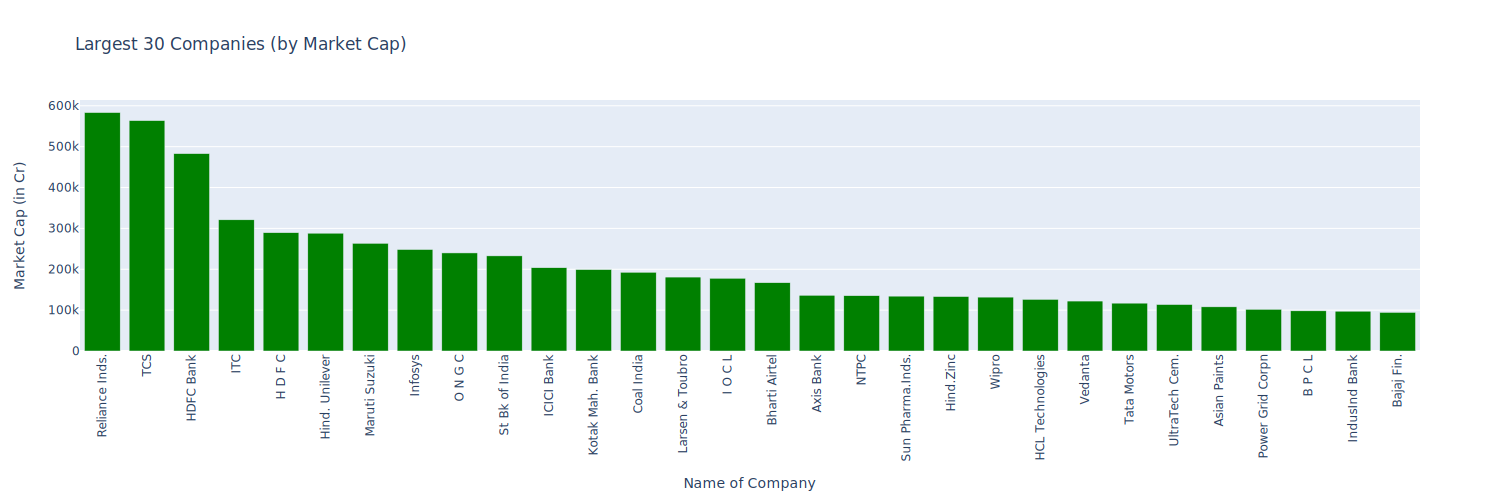

In [223]:
x = df['Name of Company'].head(30)
y = df['Market Cap (in Cr)'].head(30)

# Create the bar chart using Plotly Express
fig = px.bar(
    x=x, 
    y=y, 
    labels={'x': 'Name of Company', 'y': 'Market Cap (in Cr)'},
    title='Largest 30 Companies (by Market Cap)',
    color_discrete_sequence=['green']
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Name of Company',
    yaxis_title='Market Cap (in Cr)',
    width=1500,  # Width of the figure
    height=500,
    xaxis_tickangle=-90  # Rotate x-axis labels vertically
)

# Show the plot
fig.show()

### ***10 LOWEST MARKET CAP COMPANIES***

In [224]:
sorted_df = df.sort_values(by='Market Cap (in Cr)', ascending=True)
smallest_mk_cap_comp = sorted_df
for i in range(10):
    print(f"Market Cap: {sorted_df.iloc[i]['Name of Company']}, {sorted_df.iloc[i]['Market Cap (in Cr)'].astype(int)} Cr")

Market Cap: Natl.Fertilizer, 3017 Cr
Market Cap: Orient Cement, 3024 Cr
Market Cap: NOCIL, 3026 Cr
Market Cap: Lak. Vilas Bank, 3029 Cr
Market Cap: Prime Focus, 3031 Cr
Market Cap: Va Tech Wabag, 3041 Cr
Market Cap: Deepak Fert., 3079 Cr
Market Cap: Star Ferro Cem., 3115 Cr
Market Cap: Kaveri Seed Co., 3125 Cr
Market Cap: Firstsour.Solu., 3139 Cr


### ***30 LOWEST MARKET CAP COMPANIES***

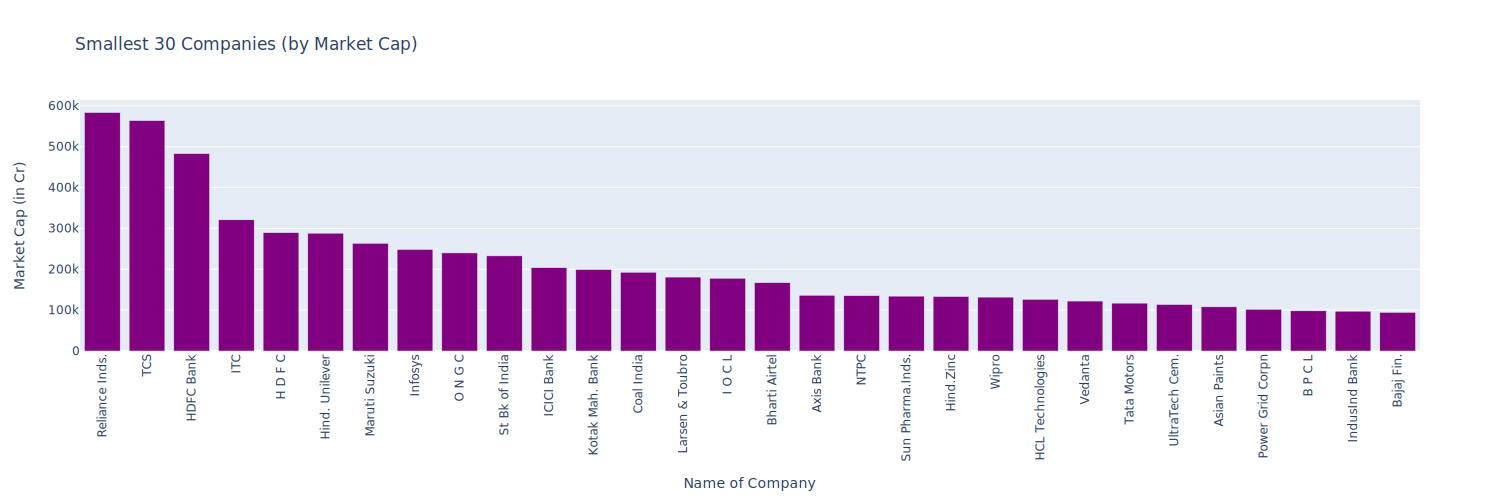

In [225]:
x = df['Name of Company'].head(30)
y = df['Market Cap (in Cr)'].head(30)

# Create the bar chart using Plotly Express
fig = px.bar(
    x=x, 
    y=y, 
    labels={'x': 'Name of Company', 'y': 'Market Cap (in Cr)'},
    title='Smallest 30 Companies (by Market Cap)',
    color_discrete_sequence=['purple']
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Name of Company',
    yaxis_title='Market Cap (in Cr)',
    width=1500,  # Width of the figure
    height=500,
    xaxis_tickangle=-90  # Rotate x-axis labels vertically
)

# Show the plot
fig.show()

### ***TOP QUARTERLY SALES COMPANIES***

In [226]:
sorted_df = df.sort_values(by='Quaterly Sales (in Cr)', ascending=False)
largest_qt_sales_comp = sorted_df
for i in range(10):
    print(f"Quaterly Sales: {sorted_df.iloc[i]['Name of Company']}, {sorted_df.iloc[i]['Quaterly Sales (in Cr)'].astype(int)} Cr")

Quaterly Sales: I O C L, 110666 Cr
Quaterly Sales: Reliance Inds., 99810 Cr
Quaterly Sales: Tata Motors, 74156 Cr
Quaterly Sales: B P C L, 60616 Cr
Quaterly Sales: H P C L, 57474 Cr
Quaterly Sales: St Bk of India, 57014 Cr
Quaterly Sales: Rajesh Exports, 41304 Cr
Quaterly Sales: Tata Steel, 32464 Cr
Quaterly Sales: TCS, 30904 Cr
Quaterly Sales: Larsen & Toubro, 28747 Cr


### ***TOP 30 HIGHEST QUARTERLY SALES COMPANIES***

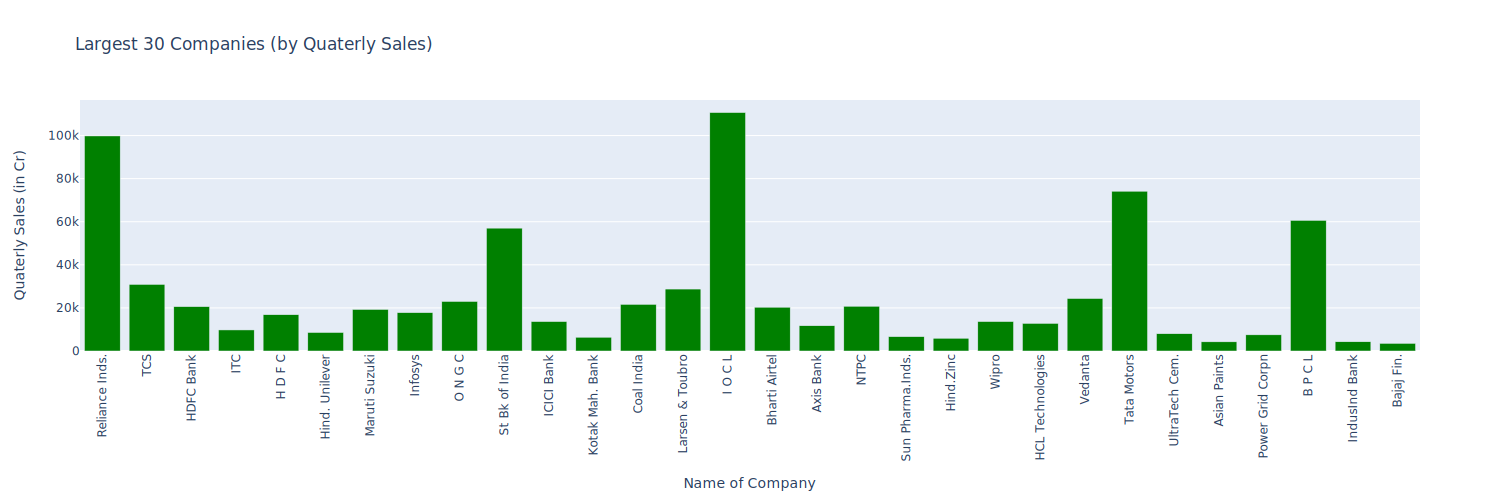

In [227]:
x = df['Name of Company'].head(30)
y = df['Quaterly Sales (in Cr)'].head(30)

# Create the bar chart using Plotly Express
fig = px.bar(
    x=x, 
    y=y, 
    labels={'x': 'Name of Company', 'y': 'Quaterly Sales (in Cr)'},
    title='Largest 30 Companies (by Quaterly Sales)',
    color_discrete_sequence=['green']
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Name of Company',
    yaxis_title='Quaterly Sales (in Cr)',
    width=1500,  # Width of the figure
    height=500,# to export full size plot
    xaxis_tickangle=-90  # Rotate x-axis labels vertically
)

# Show the plot
fig.show()

### ***10 SMALLEST QUARTERLY SALES COMPANIES***

In [228]:
sorted_df = df.sort_values(by='Quaterly Sales (in Cr)', ascending=True)
smallest_qt_sales_comp = sorted_df
for i in range(10):
    print(f"Quaterly Sales: {sorted_df.iloc[i]['Name of Company']}, {sorted_df.iloc[i]['Quaterly Sales (in Cr)'].astype(int)} Cr")

Quaterly Sales: Central Dep. Ser, 47 Cr
Quaterly Sales: La Opala RG, 69 Cr
Quaterly Sales: Kaveri Seed Co., 70 Cr
Quaterly Sales: Thyrocare Tech., 77 Cr
Quaterly Sales: I T D C, 102 Cr
Quaterly Sales: MAS FINANC SER, 112 Cr
Quaterly Sales: Zydus Wellness, 132 Cr
Quaterly Sales: Hathway Cable, 138 Cr
Quaterly Sales: Ent.Network, 148 Cr
Quaterly Sales: Guj Pipavav Port, 162 Cr


### ***30 SMALLEST QUARTERLY SALES COMPANIES***

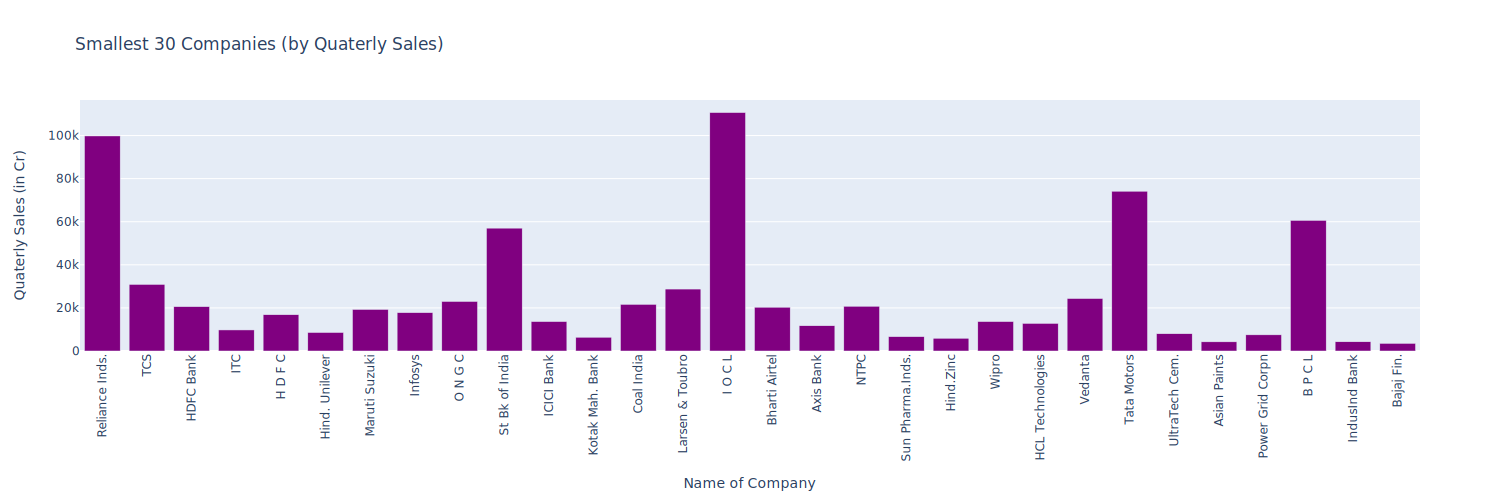

In [229]:
x = df['Name of Company'].head(30)
y = df['Quaterly Sales (in Cr)'].head(30)

# Create the bar chart using Plotly Express
fig = px.bar(
    x=x, 
    y=y, 
    labels={'x': 'Name of Company', 'y': 'Quaterly Sales (in Cr)'},
    title='Smallest 30 Companies (by Quaterly Sales)',
    color_discrete_sequence=['purple']
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Name of Company',
    yaxis_title='Quaterly Sales (in Cr)',
    width=1500,  # Width of the figure
    height=500,
    xaxis_tickangle=-90  # Rotate x-axis labels vertically for better readability
)

# Show the plot
fig.show()

### ***CALCULATE THE SALES EFFIECIENCY RATIO***

In [230]:
df['Sales Efficiency Ratio'] = (df['Market Cap (in Cr)'] / df['Quaterly Sales (in Cr)']).round(2)

### ***TOP SALES EFFICEINCY RATIO COMPANIES***

In [231]:
sorted_df = df.sort_values(by='Sales Efficiency Ratio', ascending=False)
largest_sales_eff_ratio_comp = sorted_df
for i in range(10):
    if sorted_df.iloc[i]['Sales Efficiency Ratio'] == 'inf':
        pass
    print(f"Sales Efficiency Ratio: {sorted_df.iloc[i]['Name of Company']}, {sorted_df.iloc[i]['Sales Efficiency Ratio'].astype(float)}")

Sales Efficiency Ratio: Central Dep. Ser, 70.2
Sales Efficiency Ratio: Indiabulls Vent., 56.18
Sales Efficiency Ratio: Symphony, 54.6
Sales Efficiency Ratio: Gillette India, 53.93
Sales Efficiency Ratio: La Opala RG, 50.32
Sales Efficiency Ratio: Oberoi Realty, 45.04
Sales Efficiency Ratio: Kaveri Seed Co., 44.25
Sales Efficiency Ratio: Thyrocare Tech., 43.35
Sales Efficiency Ratio: GRUH Finance, 43.26
Sales Efficiency Ratio: Reliance Nip.Lif, 42.27


### ***30 LARGEST COMPANIES BY SALES EFFICIENCY RATIO***

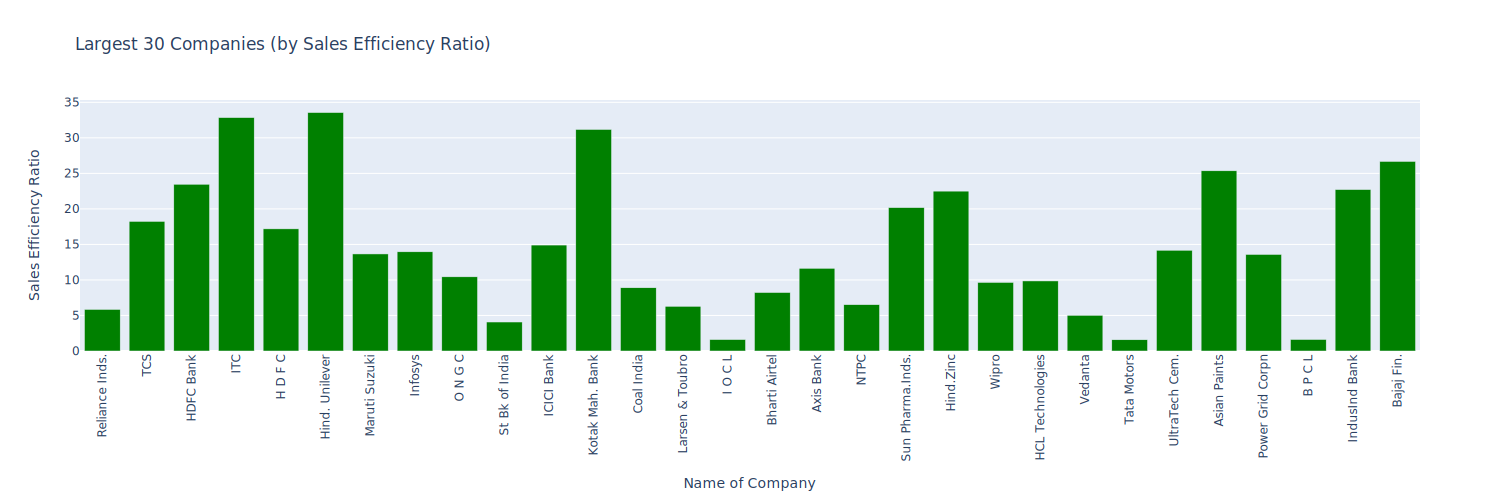

In [232]:
x = df['Name of Company'].head(30)
y = df['Sales Efficiency Ratio'].head(30)

# Create the bar chart using Plotly Express
fig = px.bar(
    x=x, 
    y=y, 
    labels={'x': 'Name of Company', 'y': 'Sales Efficiency Ratio'},
    title='Largest 30 Companies (by Sales Efficiency Ratio)',
    color_discrete_sequence=['green']
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Name of Company',
    yaxis_title='Sales Efficiency Ratio',
    width=1500,  # Width of the figure
    height=500,
    xaxis_tickangle=-90  # Rotate x-axis labels vertically for better readability
)

# Show the plot
fig.show()

### ***SMALLEST COMAPANIES IN TERMS OF THE SALES EFFICIENCY RATION***

In [233]:
sorted_df = df.sort_values(by='Sales Efficiency Ratio', ascending=True)
smallest_sales_eff_ratio_comp = sorted_df
for i in range(10):
    print(f"Sales Efficiency Ratio: {sorted_df.iloc[i]['Name of Company']}, {sorted_df.iloc[i]['Sales Efficiency Ratio'].astype(float)}")

Sales Efficiency Ratio: Redington India, 0.5
Sales Efficiency Ratio: Rajesh Exports, 0.57
Sales Efficiency Ratio: C P C L, 0.63
Sales Efficiency Ratio: Hind.Construct., 0.79
Sales Efficiency Ratio: Amber Enterp., 0.8
Sales Efficiency Ratio: JP Power Ven., 0.82
Sales Efficiency Ratio: Corporation Bank, 0.85
Sales Efficiency Ratio: Oriental Bank, 0.86
Sales Efficiency Ratio: IFCI, 0.86
Sales Efficiency Ratio: Shriram Pistons, 0.87


### ***30 SMALLEST COMPANIES IN TERMS OF THE SALES EFFIECIENCY RATIO***

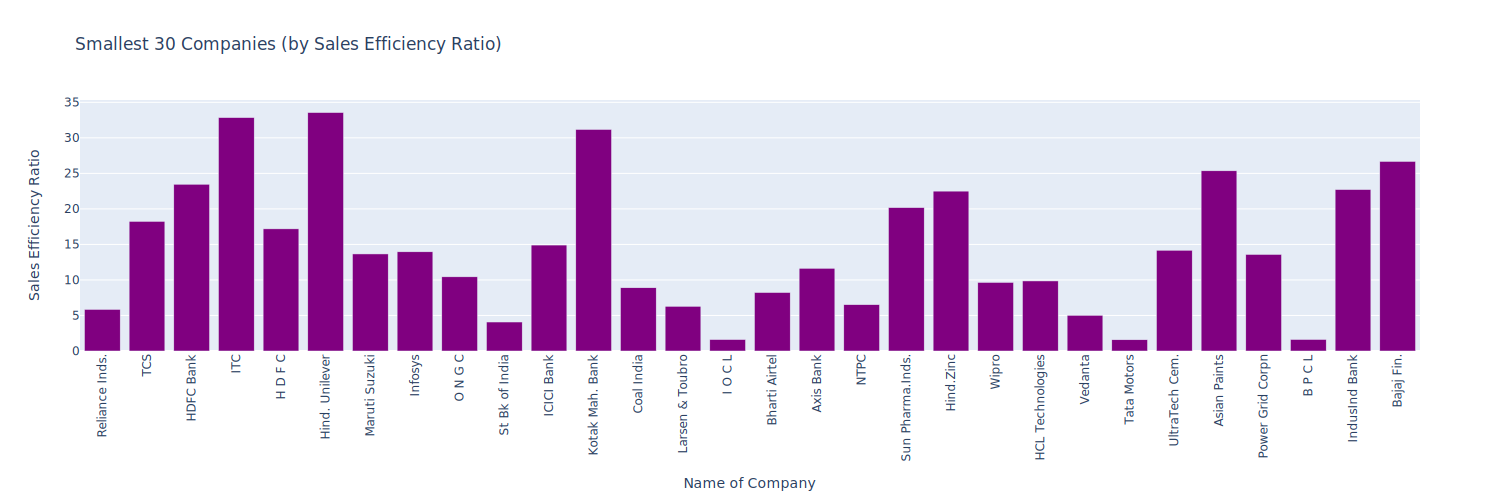

In [234]:
x = df['Name of Company'].head(30)
y = df['Sales Efficiency Ratio'].head(30)

# Create the bar chart using Plotly Express
fig = px.bar(
    x=x, 
    y=y, 
    labels={'x': 'Name of Company', 'y': 'Sales Efficiency Ratio'},
    title='Smallest 30 Companies (by Sales Efficiency Ratio)',
    color_discrete_sequence=['purple']
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Name of Company',
    yaxis_title='Sales Efficiency Ratio',
    width=1500,  # Width of the figure
    height=500,
    xaxis_tickangle=-90  # Rotate x-axis labels vertically for better readability
)

# Show the plot
fig.show()

In [235]:
df.columns

Index(['Name of Company', 'Market Cap (in Cr)', 'Quaterly Sales (in Cr)',
       'Sales Efficiency Ratio'],
      dtype='object')

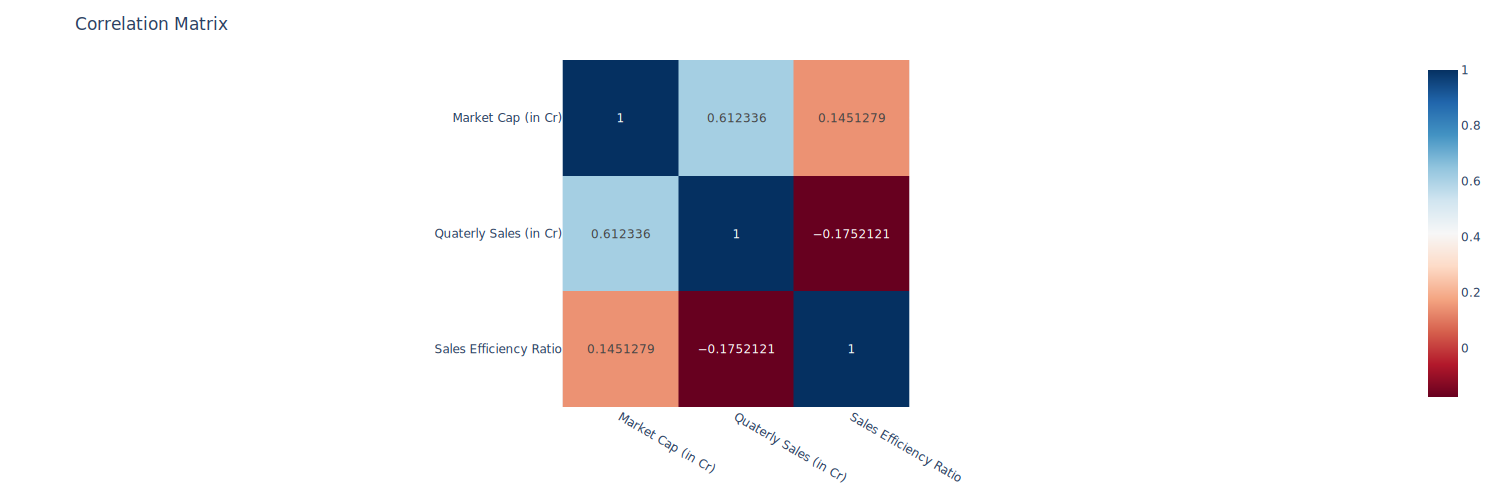

In [236]:
# Compute correlation matrix
corr = df[['Market Cap (in Cr)', 'Quaterly Sales (in Cr)', 'Sales Efficiency Ratio']].corr()

# Plot heatmap
fig = px.imshow(corr, text_auto=True, color_continuous_scale='RdBu')
fig.update_layout(title='Correlation Matrix', width=1500, height=500)
fig.show()

### ***MARKET CAPITALIZATION VS QUARTERLY SALES***

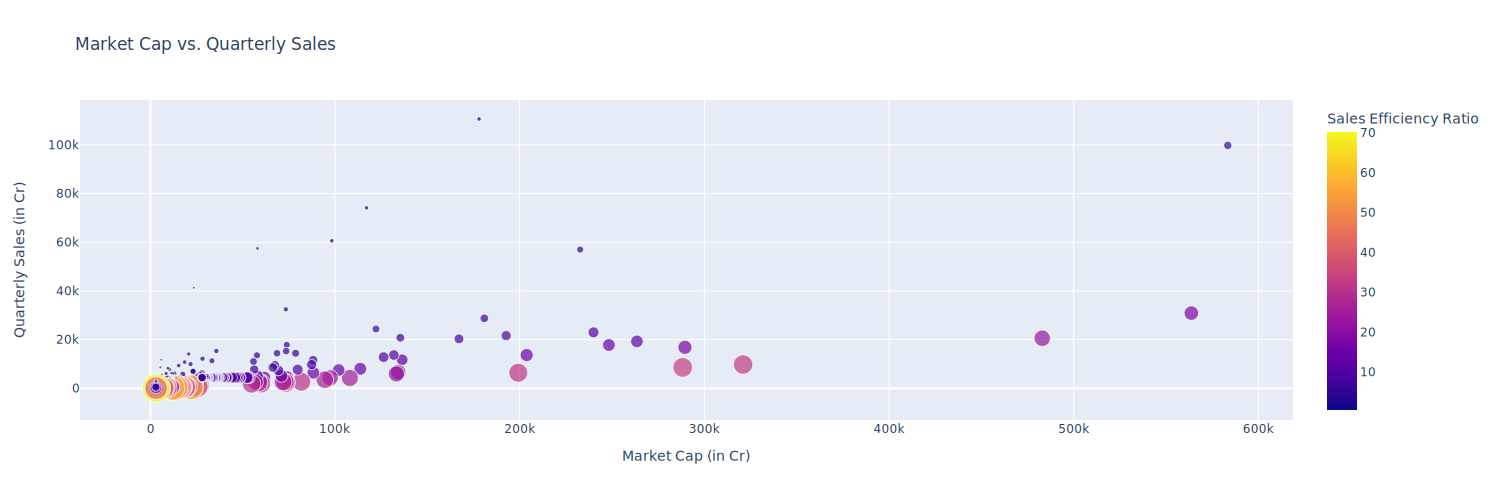

In [237]:
# Scatter plot
fig = px.scatter(df, x='Market Cap (in Cr)', y='Quaterly Sales (in Cr)', size='Sales Efficiency Ratio',
                 color='Sales Efficiency Ratio', hover_name='Name of Company',
                 title='Market Cap vs. Quarterly Sales')
fig.update_layout(xaxis_title='Market Cap (in Cr)', yaxis_title='Quarterly Sales (in Cr)',width=1500,height=500)
fig.show()


### ***10 BIG COMPANIES BY MARKET CAP***

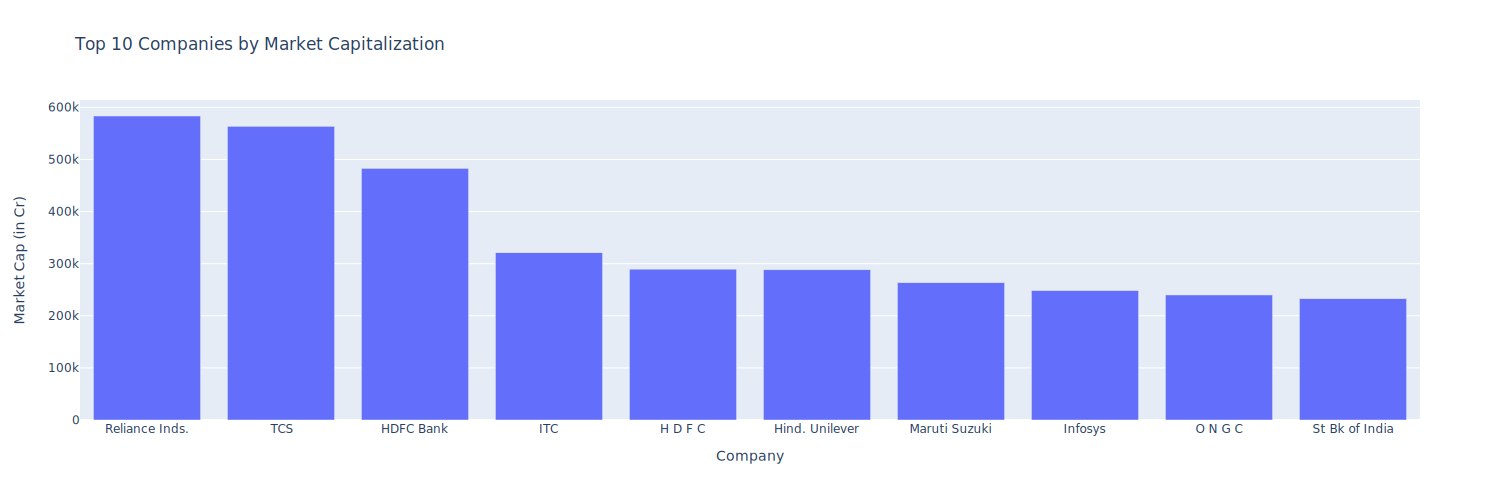

In [240]:
# Top 10 companies by market cap
top_companies = df.nlargest(10, 'Market Cap (in Cr)')

# Bar plot
fig = px.bar(top_companies, x='Name of Company', y='Market Cap (in Cr)',
             title='Top 10 Companies by Market Capitalization',
             labels={'Market Cap (in Cr)': 'Market Cap (in Cr)'})
fig.update_layout(xaxis_title='Company', yaxis_title='Market Cap (in Cr)',width=1500,height=500)
fig.show()


### ***DISTRIBUTION AND DESCRIPTION OF THE NUMERICAL COLUMNS***

In [ ]:
stats = df[['Market Cap (in Cr)', 'Quaterly Sales (in Cr)', 'Sales Efficiency Ratio']].describe().transpose()
print(stats)

# Plotting with Plotly
import plotly.graph_objects as go

# Histogram and density plots
def plot_distribution(df, column_name):
    fig = go.Figure()
    
    # Histogram
    fig.add_trace(go.Histogram(x=df[column_name], name=f'{column_name} Histogram', histnorm='probability density'))
    
    # Density plot
    fig.add_trace(go.Histogram(x=df[column_name], name=f'{column_name} Density', histnorm='probability density', histfunc='count', opacity=0.5))
    
    fig.update_layout(
        title=f'Distribution of {column_name}',
        xaxis_title=column_name,
        yaxis_title='Density',
        width=1500,  # Width of the figure
        height=500,
        barmode='overlay'
    )
    
    return fig

# Plot for each variable
fig_market_cap = plot_distribution(df, 'Market Cap (in Cr)')
fig_quarterly_sales = plot_distribution(df, 'Quaterly Sales (in Cr)')
fig_sales_efficiency = plot_distribution(df, 'Sales Efficiency Ratio')

# Show plots
fig_market_cap.show()
fig_quarterly_sales.show()
fig_sales_efficiency.show()

                         count     mean        std        min       25%    \
Market Cap (in Cr)     488.0000 28043.8571 58912.5858 3017.0700 4879.6125   
Quaterly Sales (in Cr) 488.0000  4395.9768  9589.6807   47.2400  725.7325   
Sales Efficiency Ratio 488.0000    10.2448    10.1328    0.5000    3.0275   

                           50%        75%         max     
Market Cap (in Cr)     10380.4250 25502.0850 583436.7200  
Quaterly Sales (in Cr)  2095.3350  4395.9768 110666.9300  
Sales Efficiency Ratio     7.2300    13.6650     70.2000  


### ***CORRELETION IN THE DATA***

In [ ]:
corr_matrix = df[['Market Cap (in Cr)', 'Quaterly Sales (in Cr)', 'Sales Efficiency Ratio']].corr()

# Create a heatmap
fig_corr = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis',
    zmin=-1, zmax=1,
    colorbar=dict(title='Correlation'),
    text=corr_matrix.values.round(2),  # Add correlation numbers to the heatmap
    texttemplate="%{text}",  # Format the text
))

fig_corr.update_layout(
    title='Correlation Matrix',
    xaxis_title='Variables',
    yaxis_title='Variables',
    width=1500,  # Width of the figure
    height=500,
)

fig_corr.show()

In [ ]:
# Scatter plot for Market Cap vs Quarterly Sales
fig_market_sales = px.scatter(df, x='Market Cap (in Cr)', y='Quaterly Sales (in Cr)',
                              title='Market Cap vs Quarterly Sales',
                              labels={'Market Cap (in Cr)': 'Market Cap (in Cr)',
                                      'Quarterly Sales (in Cr)': 'Quarterly Sales (in Cr)'},
                              hover_name='Name of Company',
                              color='Sales Efficiency Ratio',
                              color_continuous_scale='Viridis',width=1500,height=500)

fig_market_sales.show()

# Scatter plot for Quarterly Sales vs Sales Efficiency Ratio
fig_sales_efficiency = px.scatter(df, x='Quaterly Sales (in Cr)', y='Sales Efficiency Ratio',
                                  title='Quarterly Sales vs Sales Efficiency Ratio',
                                  labels={'Quarterly Sales (in Cr)': 'Quarterly Sales (in Cr)',
                                          'Sales Efficiency Ratio': 'Sales Efficiency Ratio'},
                                  hover_name='Name of Company',
                                  color='Market Cap (in Cr)',
                                  color_continuous_scale='Viridis',width=1500,height=500)

fig_sales_efficiency.show()

### ***TOP COMPANIES ANALYSIS***

In [ ]:
top_market_cap = df.nlargest(10, 'Market Cap (in Cr)')

# Top companies based on Quarterly Sales
top_sales = df.nlargest(10, 'Quaterly Sales (in Cr)')

# Top companies based on Sales Efficiency Ratio
top_efficiency = df.nlargest(10, 'Sales Efficiency Ratio')

# Create subplots for performance metrics comparison
fig = go.Figure()

# Add Market Cap Bar Plot
fig.add_trace(go.Bar(
    x=top_market_cap['Name of Company'],
    y=top_market_cap['Market Cap (in Cr)'],
    name='Market Cap (in Cr)',
    marker_color='blue'
))

# Add Quarterly Sales Bar Plot
fig.add_trace(go.Bar(
    x=top_sales['Name of Company'],
    y=top_sales['Quaterly Sales (in Cr)'],
    name='Quaterly Sales (in Cr)',
    marker_color='orange'
))

# Add Sales Efficiency Ratio Bar Plot
fig.add_trace(go.Bar(
    x=top_efficiency['Name of Company'],
    y=top_efficiency['Sales Efficiency Ratio'],
    name='Sales Efficiency Ratio',
    marker_color='green'
))

fig.update_layout(
    title='Top Companies Analysis',
    xaxis_title='Company',
    yaxis_title='Value',
    barmode='group',
    width=1500,  # Width of the figure
    height=500,
    xaxis_tickangle=-45
)

fig.show()

### ***AUTOVIZ VISULATION***

Shape of your Data Set loaded: (488, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    4 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['S.No.', 'Name']

################ Regression problem ################

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Mar Cap - Crore,float64,0.208333,NA,3017.070000,583436.720000,"1 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 63 outliers greater than upper bound (51609.39) or lower than lower bound(-23215.91). Cap them or remove them."
Unnamed: 4,float64,80.416667,NA,0.000000,7757.060000,"386 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 6 outliers greater than upper bound (4976.29) or lower than lower bound(-2334.30). Cap them or remove them."
Sales Qtr - Crore,float64,23.958333,76,,,"115 missing values. Impute them with mean, median, mode, or a constant value such as 123."


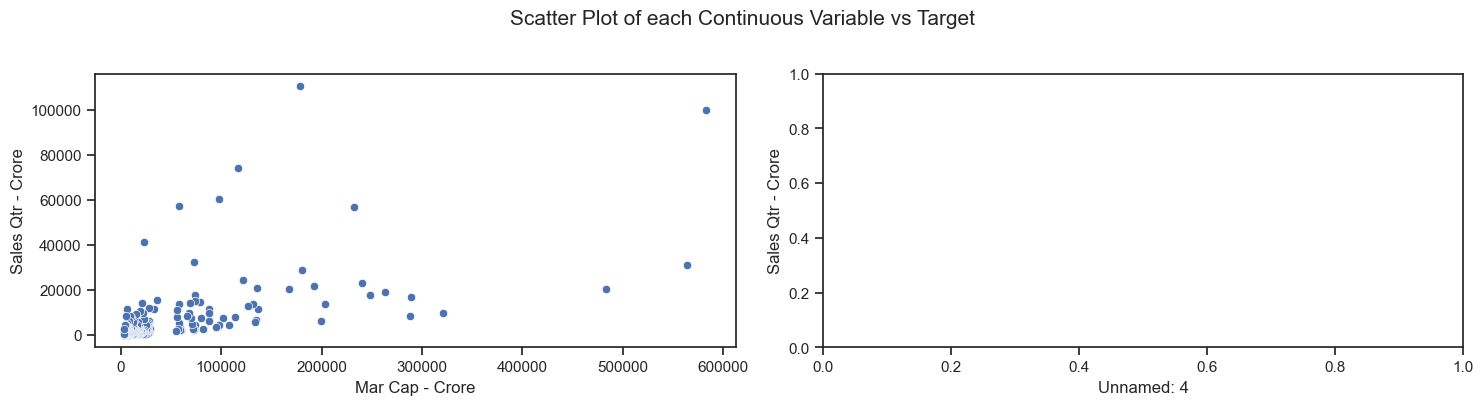

Number of All Scatter Plots = 3


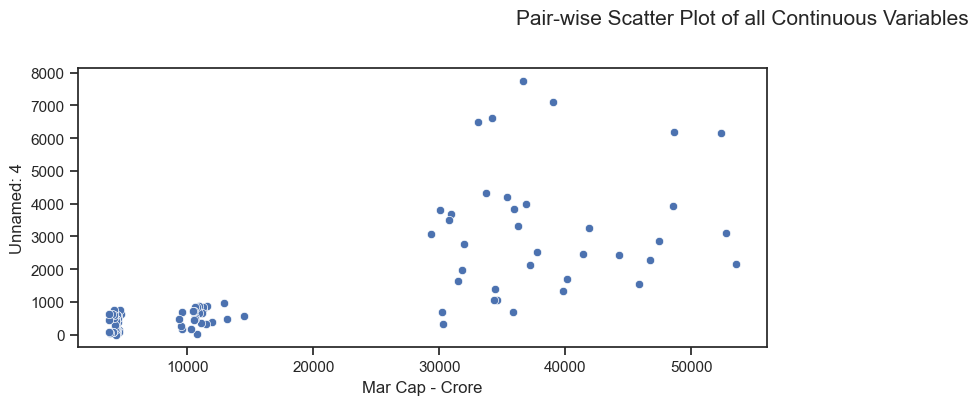

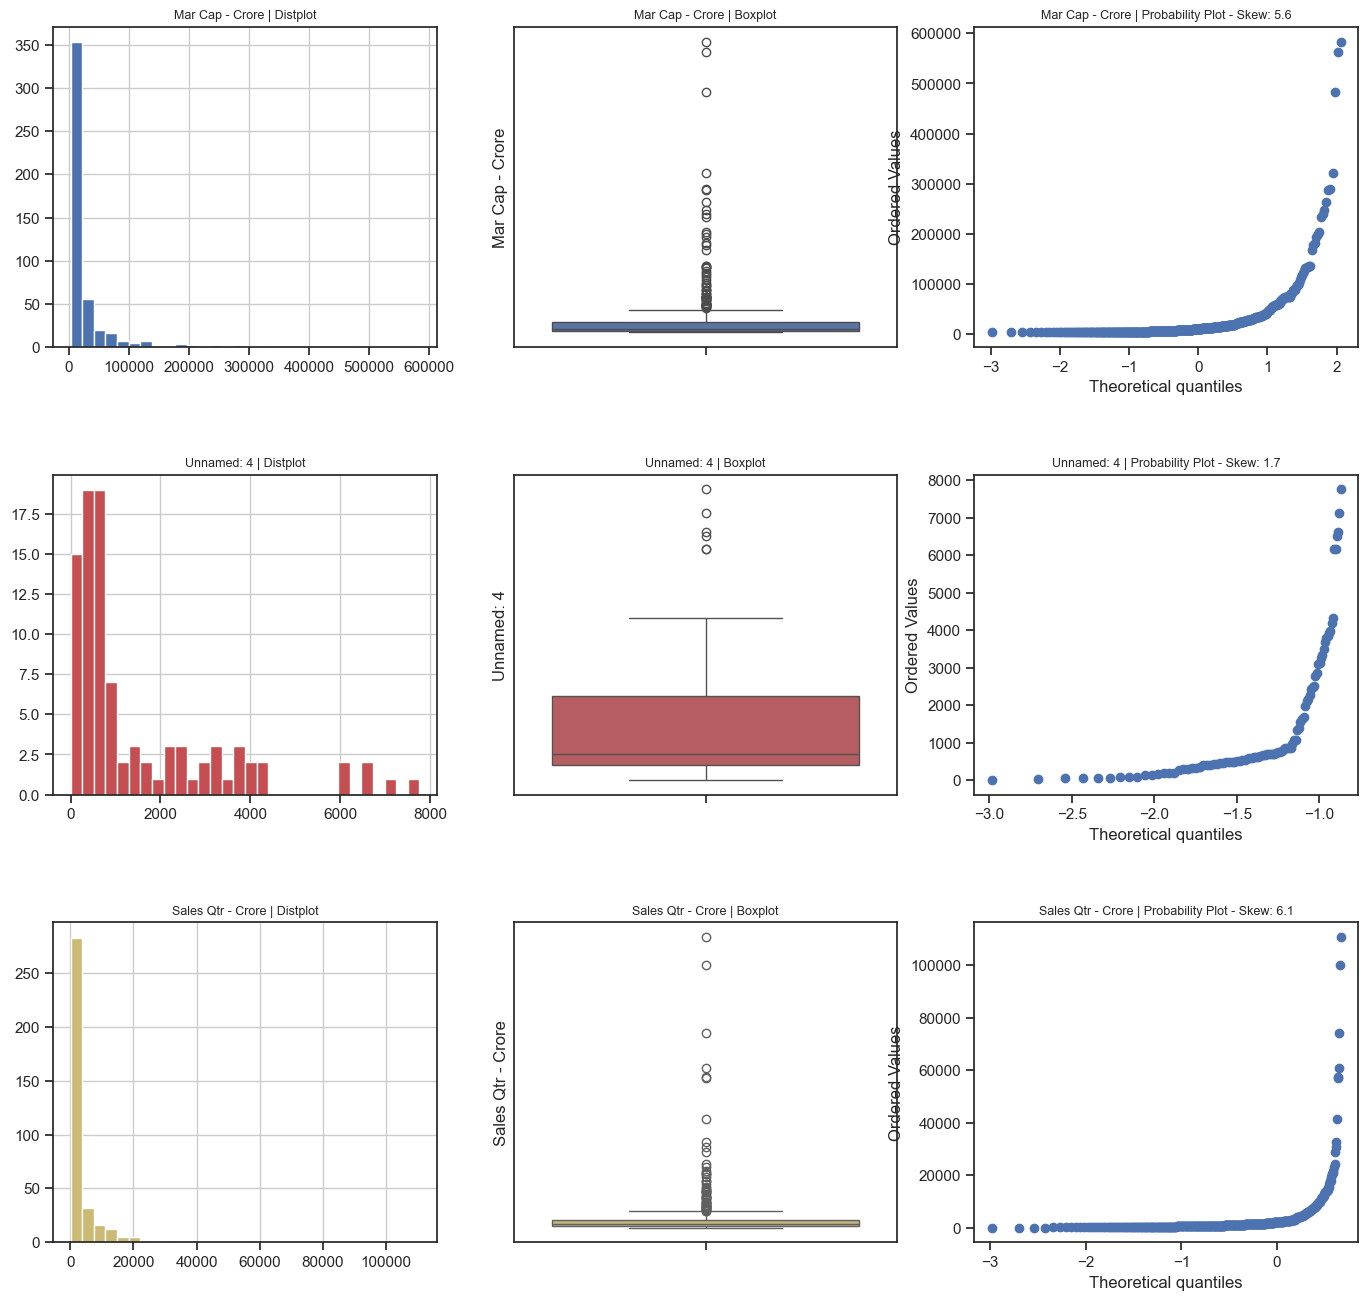

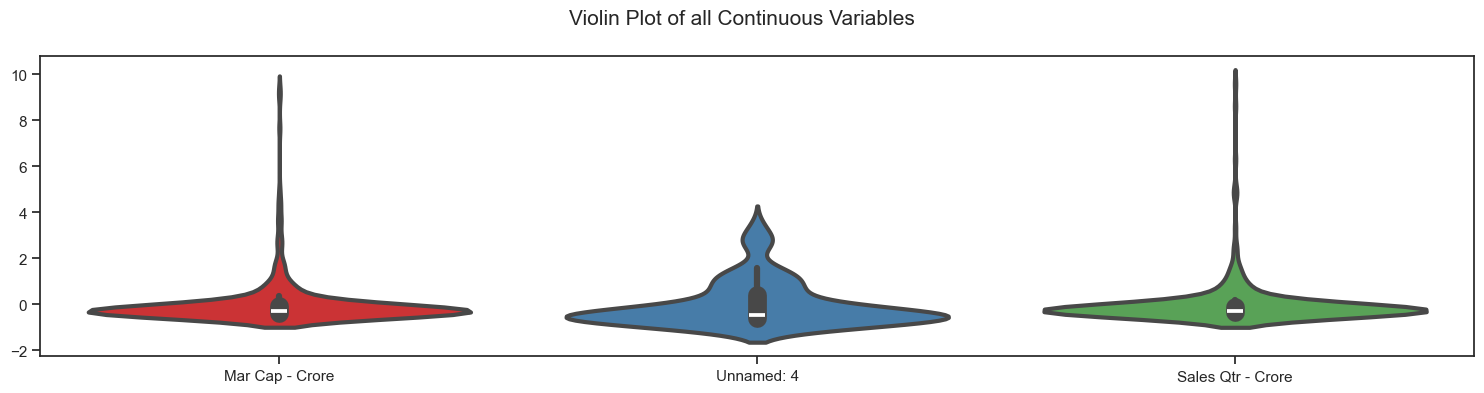

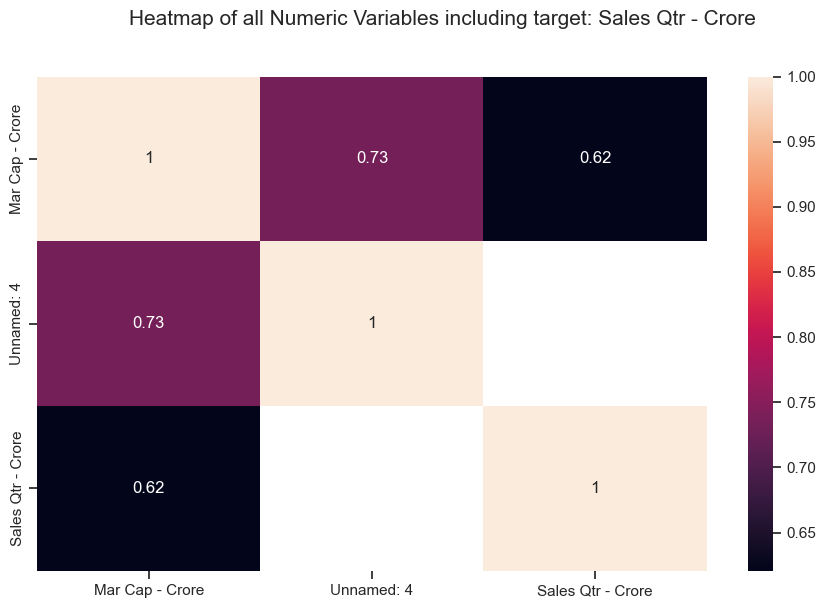

All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
from autoviz import AutoViz_Class
AV = AutoViz_Class()

filename = "Financial Analytics data.csv"
target_variable = "Sales Qtr - Crore"

dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

## Findings and Insights

**Market Capitalization:**
- **Largest Market Cap**: Reliance Industries (₹5,83,436 Cr)
- **Smallest Market Cap**: National Fertilizers (₹3,017 Cr)

**Quarterly Sales:**
- **Highest Quarterly Sales**: IOCL (₹1,10,666 Cr)
- **Lowest Quarterly Sales**: Ujjivan Financial Services (₹0 Cr)

**Sales Efficiency Ratio:**
- **Highest Sales Efficiency Ratio**: Central Depository Services (70.2)
- **Lowest Sales Efficiency Ratio**: Redington India (0.5)

**Distribution Insights:**
- The majority of companies have a market capitalization between ₹0 and ₹1,50,000 Cr.
- The majority of companies report quarterly sales between ₹0 and ₹27,500 Cr.

## Conclusion

Reliance Industries stands out as the leader in market capitalization, reflecting its dominant position in the market. On the other hand, Ujjivan Financial Services struggles with both low quarterly sales and a low sales efficiency ratio, indicating potential areas for improvement. The analysis also reveals that most companies fall within a specific range for market capitalization and quarterly sales, which highlights the typical market distribution. These insights offer a snapshot of the competitive dynamics and can guide strategic decisions for businesses operating in this sector.


---